In [1]:
# Necessary libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NB1 = 1.3199 # +- 0.066
NB2 = 0.7066 # +- 0.049
IB1 = 0      # A
IB2 = 4.2    # A
FONTSZ = 18

k = (NB1 - NB2) / (IB1 - IB2)
b = (NB1 * IB2 - NB2 * IB1) / (IB2 - IB1)

getBack = lambda I: k * I + b

In [3]:
df = pd.read_csv('./src/csv/all.csv', sep=',', header=0, index_col=False)
df['N - N_b'] = df['N'] - getBack(df['I'])

t = 100 # sec
sigma_t = 0.1
df['\sigma'] = np.sqrt(np.abs(df['N - N_b'])/ t + df['N - N_b']**2 * sigma_t**2 / t**4)

df.sort_values(by=['I'], inplace=True)
I, N, N_min_N_b, sigmaN_min_N_b = df.to_numpy().transpose()
print(N_min_N_b)

[ 4.47023810e-02  9.93047619e-02 -1.16092857e-01  2.58509524e-01
  2.33111905e-01  8.01316667e-01  8.65919048e-01  9.30521429e-01
  1.74512381e+00  2.31972619e+00  2.79432857e+00  3.76893095e+00
  3.73353333e+00  4.92713571e+00  5.66173810e+00  5.85634048e+00
  6.93094286e+00  6.82554524e+00  6.95014762e+00  6.58475000e+00
  6.38935238e+00  5.86395476e+00  5.08855714e+00  4.21315952e+00
  3.58876190e+00  3.10336429e+00  2.58796667e+00  2.60526786e+00
  2.59256905e+00  3.40987024e+00  4.23717143e+00  5.60347262e+00
  7.25639310e+00  8.25977381e+00  1.02470750e+01  1.11033762e+01
  1.26106774e+01  1.03889786e+01  9.88627976e+00  9.13920024e+00
  7.40858095e+00  6.14188214e+00  4.23918333e+00  2.35748452e+00
  1.48478571e+00  6.50388095e-01  2.54990476e-01 -1.04071429e-02]


<ErrorbarContainer object of 3 artists>

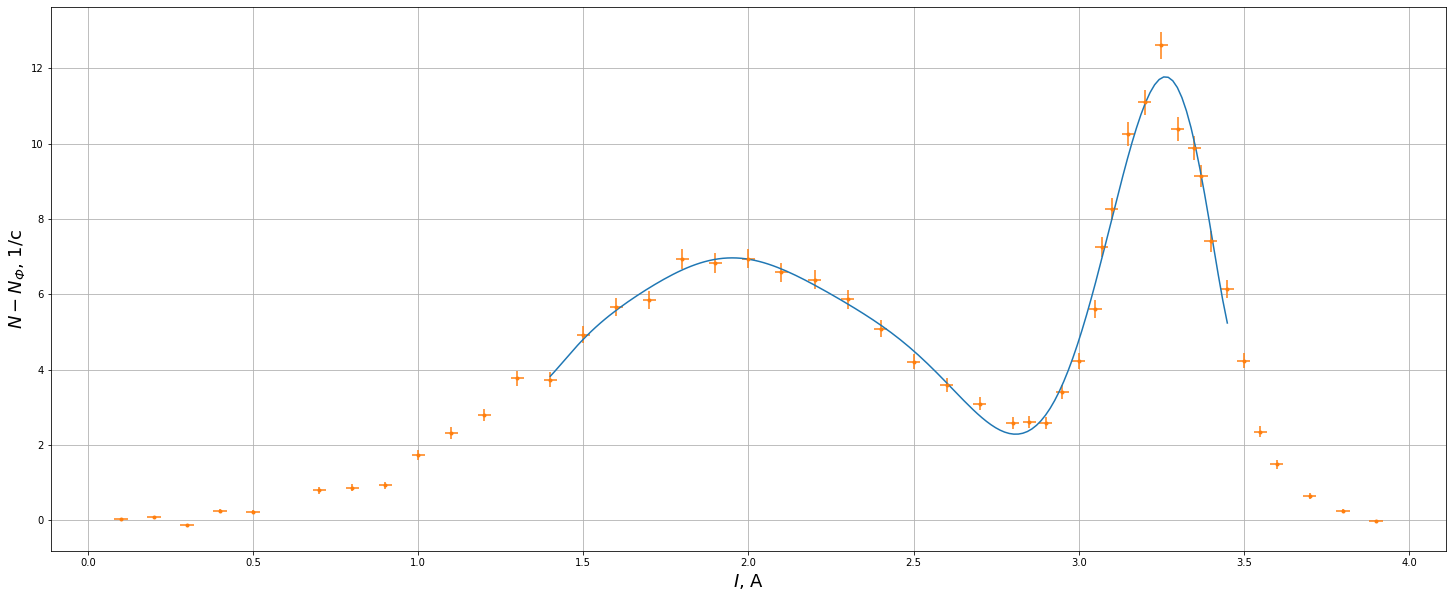

In [4]:
# Drawing from here
plt.figure(figsize=(25, 10))
plt.xlabel('$I$, A', fontsize=FONTSZ)
plt.ylabel('$N - N_{Ф}$, 1/c', fontsize=FONTSZ)
plt.grid()

# Drawing trend line
fromIdx = 11
toIdx = 43
trend = np.poly1d(np.polyfit(I[fromIdx:toIdx], N_min_N_b[fromIdx:toIdx], 10))
xTrend = np.linspace(I[fromIdx+1], I[toIdx-2], num=150)
plt.plot(xTrend, trend(xTrend))

# Drawing error bars
ierr = [0.02] * len(I)
plt.errorbar(I, N_min_N_b, sigmaN_min_N_b, ierr, marker='.', ls='')


In [5]:
argmaxN_min_N_b = np.argmax(N_min_N_b) # 1/sec
pc = 1013.5 # kEv
c = 3e8
me = 9.1e-31

e = 1.6e-19
k = pc / I[argmaxN_min_N_b]  # keV / A
dk = np.sqrt((0.05 / I[argmaxN_min_N_b])**2 + (pc * 0.05 / I[argmaxN_min_N_b]**2)**2)
print(f"k = {k} +- {dk}")

k = 311.84615384615387 +- 4.797657803026823


 
-0.4161 x + 279.7
T = 672.2483784785207 +- 495.6713068002458


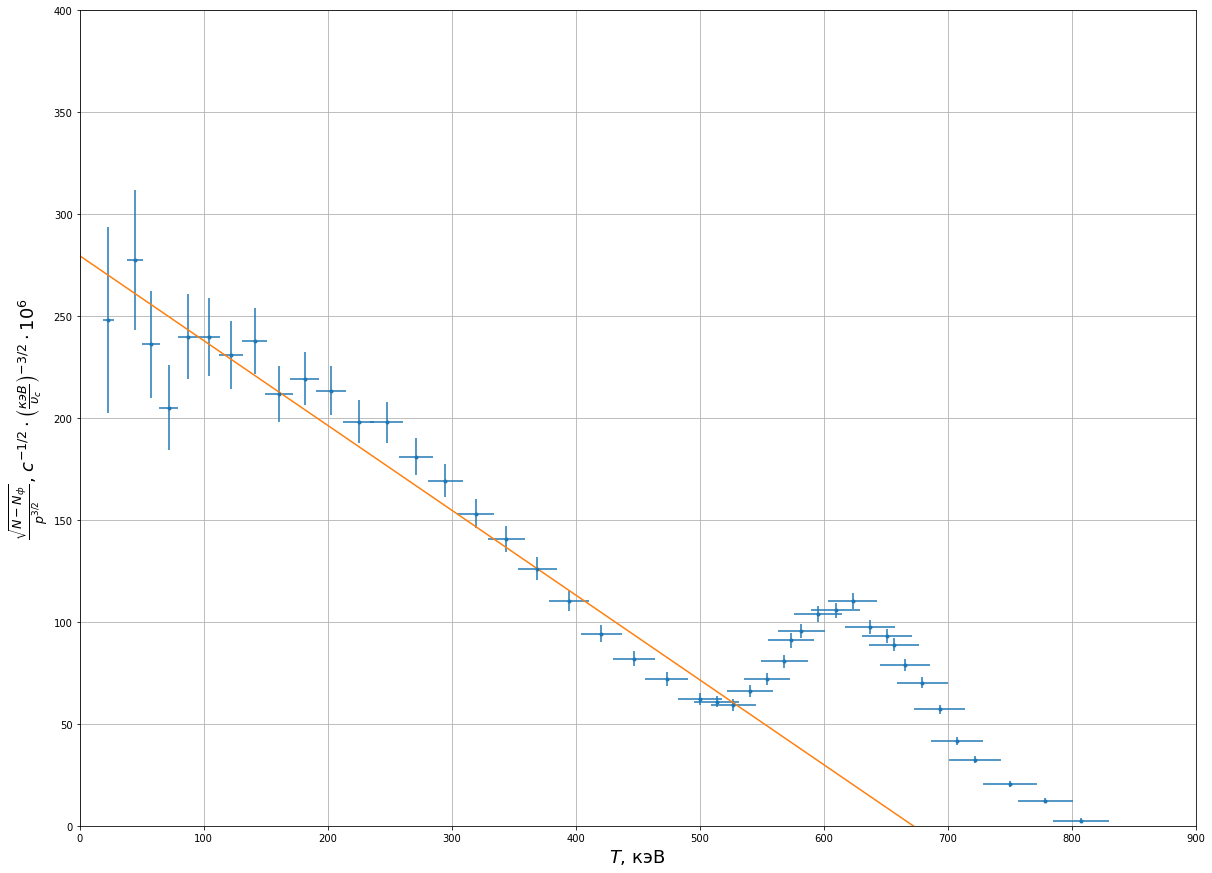

In [7]:
Ecalm = me * c**2 * 1e-3 / e # keV
dI = 0.05
dEcalm = 0.1
E = np.sqrt((k * I)**2 + Ecalm**2) - Ecalm


yax = np.sqrt(np.abs(N_min_N_b) / (k * I)**3) * 1e6
dE = np.sqrt(
        (Ecalm / np.sqrt((k * I)**2 + Ecalm**2)- 1 )**2 * dEcalm **2 + 
        (k * I**2 / np.sqrt((k * I)**2 + Ecalm**2))**2 * dk **2 +
        (k**2 * I / np.sqrt((k * I)**2 + Ecalm**2))**2 * dI **2 
)
dyax = np.sqrt(
        (1 / (2 * yax * 1e-6) * 3 * np.abs(N_min_N_b) / (k * I)**4 * I)**2 * dk **2 +
        (1 / (2 * yax * 1e-6) * 3 * np.abs(N_min_N_b) / (k * I)**4 * k)**2 * dI **2 +
        (1 / (2 * yax * 1e-6) * 1 / (k * I)**3)**2 * sigmaN_min_N_b **2
) * 1e6


plt.figure(figsize=(20, 15))
# exp plot
plt.ylim((0, 400))
plt.xlim((0, 900))
plt.errorbar(E[4:], yax[4:], xerr=dE[4:], yerr=dyax[4:], marker=".", ls="")
plt.xlabel("$T$, кэВ", fontsize=FONTSZ)
ylbl = "$\\frac{\\sqrt{N - N_ф}}{p^{3/2}}$, $с^{-1/2} \\cdot \
        \\left(\\frac{кэВ}{\\upsilon_c}\\right)^{-3/2} \cdot 10^6$"
plt.ylabel(ylbl, fontsize=FONTSZ)

# trend  line
E = E[2:]
dE = dE[2:]
yax = yax[2:]
dyax = dyax[2:]
trend = np.poly1d(np.polyfit(E[2:-20], yax[2:-20], 1))
xax = np.linspace(0, 700, num=1000)
plt.plot(xax, trend(xax))

# enable grind
plt.grid()

print(trend)
T_max = trend[0] / - trend[1]
a = trend[1]
b = trend[0]
da = 1/np.sqrt(len(E[2:-20])) * np.sqrt(
        (np.mean(yax[2:-20]**2) - np.mean(yax[2:-20])**2) / 
        (np.mean(E[2:-20]**2) - np.mean(E[2:-20])**2)
        - a**2 
)
db = da * np.sqrt(np.mean(E[2:-20]**2))
dd = np.mean(
        np.sqrt(
                (dyax[2:-20] / E[2:-20])**2 + 
                (yax[2:-20] * dE[2:-20] / E[2:-20]**2)**2
        )
)
da = np.sqrt(da**2 + dd**2)
db = np.mean(np.sqrt(
        dyax[2:-20]**2 + 
        dE[2:-20]**2 * a**2 +
        E[2:-20]**2 * da**2 + db**2
))## y - ax
dT = np.sqrt((db / a)**2 + (b * da / a**2)**2)
print(f"T = {T_max} +- {dT}")